<a href="https://colab.research.google.com/github/ch3rnoalpha/League-of-legends-game-data/blob/main/Project_2_Part_4_(Core)_league_of_legends_game_statistics_john_paredes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Imports needed libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report
from sklearn import set_config
set_config(display='diagram')

In [3]:
#let me see inital full dataset
from google.colab.data_table import DataTable
DataTable.max_columns = 40

In [4]:
#sets file to filename and creates a DF for it
filename = '/content/high_diamond_ranked_10min.csv'
df = pd.read_csv(filename)
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
#drops the last 19 columns of data, since we can just look at the stats for blue team and have the model predict off of that, can always add red data back in.
#df = df.drop(df.columns[-19:], axis=1)

In [ ]:
#quick info on the dataframe, and verifies that the red team data was dropped
df.info()

First choice: dataset 1

1) Source of data

  **kaggle**

2) Brief description of data


**League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off. There are 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game.**

3) What is the target?

**If the blue team will win based off all factors**

4) Is this a classification or regression problem?

**Classification**

5) How many features?

**40, but only blue teams data is needed**

6) How many rows of data.

**9879**

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

**Making sure i dont cause data leakage as i have had issues with that in the past.**


In [ ]:
#############################################################################################################################################################################
# Start of exploration

In [5]:
# sets all columns to lower case
df.columns = df.columns.str.lower()

In [6]:
#drops duplicates
df.drop_duplicates(keep=False, inplace=True)

In [ ]:
#displays duplicated data
df.duplicated().sum()

0

In [ ]:
#shows totals of NA data
df.isna().sum()

In [ ]:
#gets info on all columns to look for outliers, none found.
df.describe()

In [ ]:
######################################################################################################################################################################
# start of Visualizations

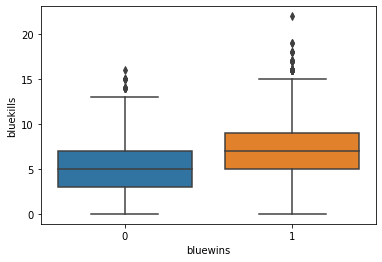

In [ ]:
#very simple boxplot to show relation
sns.boxplot(x='bluewins', y='bluekills', data=df)

Very simple box plot shows us that as expected, if blue team has more kills by the 10 minute marker, they are more likley to win them ath as awhole, the reverse is true for blue team deaths as shown below

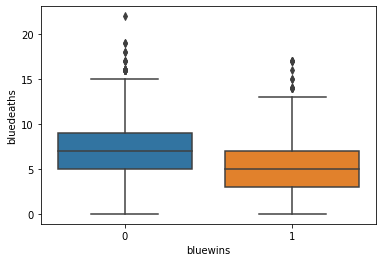

In [ ]:
#very simple boxplot to show relation
sns.boxplot(x='bluewins', y='bluedeaths', data=df)

In [ ]:
#creates a correlation matrix
corr = df.corr()

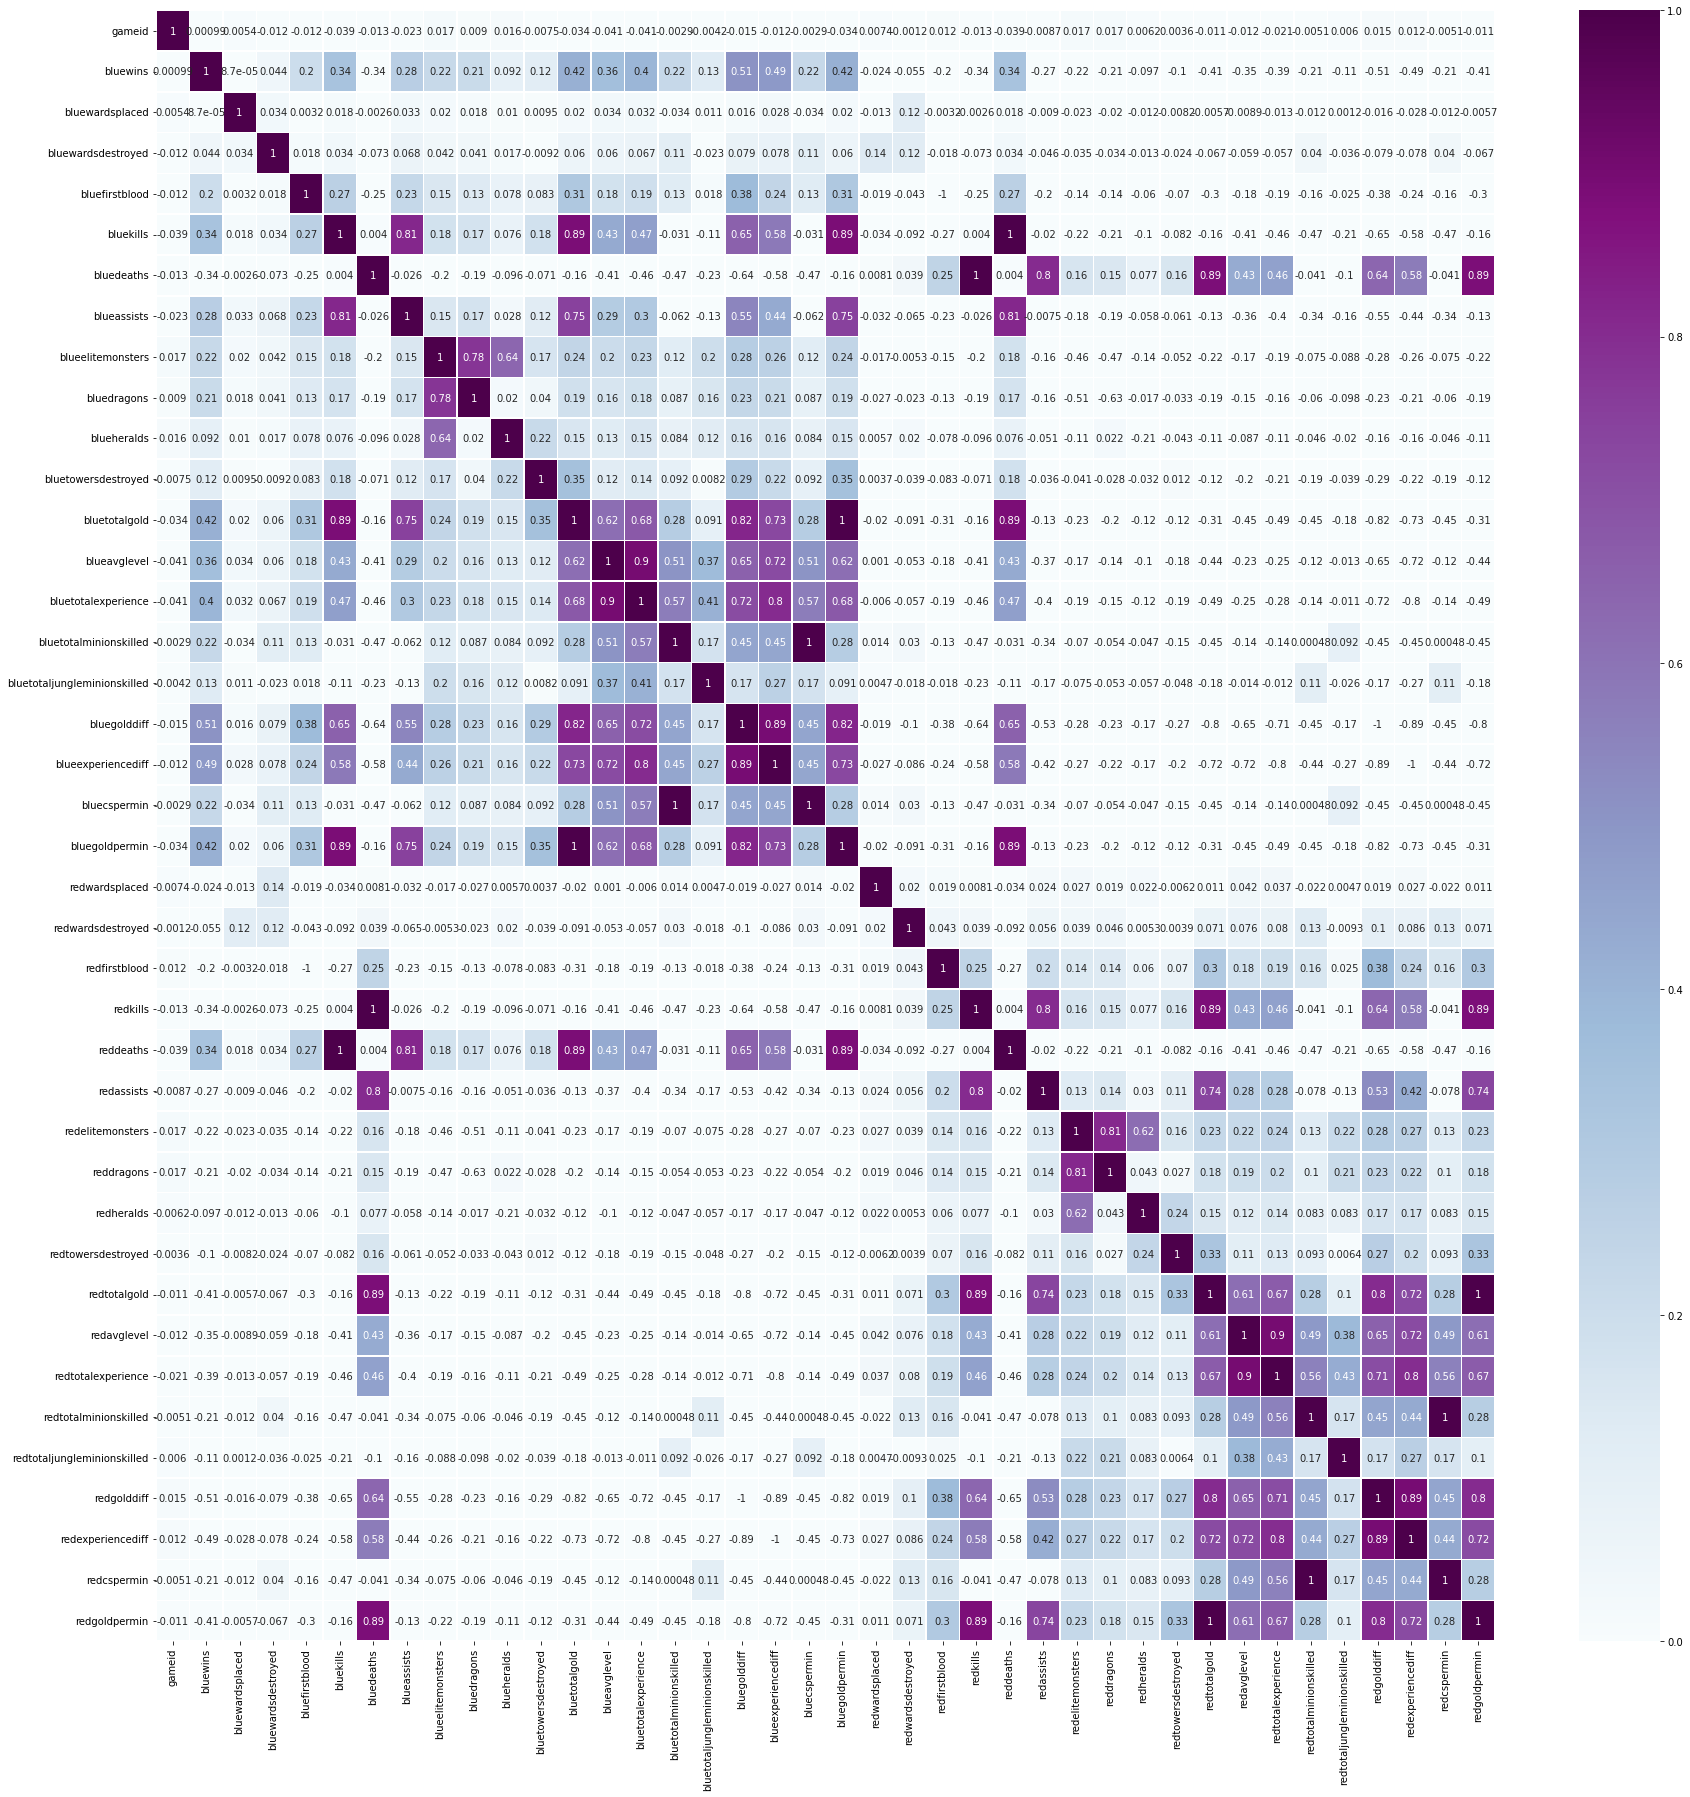

In [ ]:
#creteas a heat map to show potential relations to look into
#sets map size to be readable
plt.figure(figsize = (30,30))


sns.heatmap(corr, cmap = 'BuPu', annot = True, 
            vmin=0, vmax=1, linewidths=.5)

There is a strong correlation between blue team winning, and these features:

1. Gold per minute
2. Experience difference
3. gold difference
4. blue team kills
5. average level


# **Part 3**

Instead of stakeholders, this would be geared towards critea for recruiting players for a pro team.



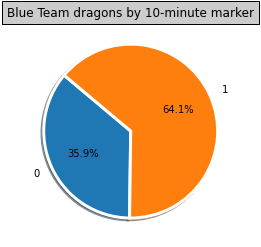

In [37]:
#graphs a piechart for first dragon
blue_dragons = df.groupby('bluewins')['bluedragons'].sum()

dragon_count='0', '1'

plt.pie(blue_dragons,labels=dragon_count, labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 3, 
                      'edgecolor' : 'white' },
        autopct='%1.1f%%',shadow=True, startangle=140);

plt.title('Blue Team dragons by 10-minute marker', bbox={'facecolor':'0.8', 'pad':5});

This simple chart shows that by 10-minutes, 64.1% of blue teams that get the first dragon kill of the game go onto win the match, which would give heavy inpportance on looking for objectice oriented players for a team.

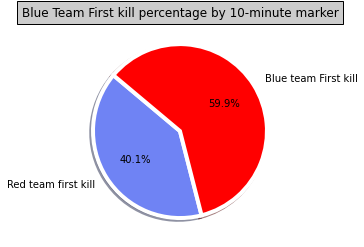

In [40]:
#graphs a piechart for first kills
blue_dragons = df.groupby('bluewins')['bluefirstblood'].sum()


colors = ['#6F83F4','#FF0000',]
first_kill='Red team first kill', 'Blue team First kill'

plt.pie(blue_dragons,
        labels=first_kill, 
        labeldistance=1.15,
        colors=colors,
        wedgeprops = { 'linewidth' : 4, 
                      'edgecolor' : 'white' },
        autopct='%1.1f%%',
        shadow=True, 
        startangle=140);

plt.title('Blue Team First kill percentage by 10-minute marker', bbox={'facecolor':'0.8', 'pad':5});

Using another pie chart to be able to easily compare to dragons by the 10 minute marker, we can see that 60% of games won, blue team had the first kill of the match, even though this is a smaller percentage than first dragon, getting the first kill can happen before the first dragon even spawns in at the 5 minute mark, making getting the first kill a top priority for a team, and then looking to secure dragon soon after

In [ ]:
######################################################################################################################################################################
# start of pre processing

In [45]:
#evaluation function for model metrics, took from class work
def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=average)
  precision = precision_score(y_true, y_predicted, average=average)
  f1 = f1_score(y_true, y_predicted, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

In [43]:
#sets up train/test split
X = df.drop(columns='bluewins')
y = df['bluewins']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()
dec_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

num_selector = make_column_selector(dtype_include = 'number')

#creates a tuple passing the columns through the scaler
num_tuple = (scaler, num_selector)

#turns it back into a column to  be passed into model pieplines
col_trans = make_column_transformer(num_tuple, remainder = 'passthrough')

# Put scaler and model in a pipeline
knn_pipe = make_pipeline(col_trans, knn)

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f446a5d3890>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [46]:
#model makes predictions and sets it to an outcome variable
knn_pipe_train_preds = knn_pipe.predict(X_train)
knn_pipe_test_preds = knn_pipe.predict(X_test)

In [47]:
#creates a report on model accuracy/scores
print('Classification Report for Training Set')
knn_train_report = classification_report(y_train, knn_pipe_train_preds)
print(knn_train_report)

print('Classification Report for Testing Set')

knn_test_report = classification_report(y_test, knn_pipe_test_preds)
print(knn_test_report)

Classification Report for Training Set
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      3713
           1       0.79      0.77      0.78      3696

    accuracy                           0.79      7409
   macro avg       0.79      0.79      0.79      7409
weighted avg       0.79      0.79      0.79      7409

Classification Report for Testing Set
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1236
           1       0.70      0.68      0.69      1234

    accuracy                           0.69      2470
   macro avg       0.69      0.69      0.69      2470
weighted avg       0.69      0.69      0.69      2470



In [51]:
#sets up random forrest pipeline
rf_pipe = make_pipeline(col_trans, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f446a5d3890>)])),
                ('randomforestclassifier', RandomForestClassifier())])

In [52]:
#gets random forrest training predictions
rf_train_preds = rf_pipe.predict(X_train)
rf_test_preds = rf_pipe.predict(X_test)

In [53]:
#creates a report on model accuracy/scores
print('Classification Report for Training Set')
rf_train_report = classification_report(y_train, rf_train_preds)
print(rf_train_report)

print('Classification Report for Testing Set')

rf_test_report = classification_report(y_test, rf_test_preds)
print(rf_test_report)

Classification Report for Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3713
           1       1.00      1.00      1.00      3696

    accuracy                           1.00      7409
   macro avg       1.00      1.00      1.00      7409
weighted avg       1.00      1.00      1.00      7409

Classification Report for Testing Set
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1236
           1       0.72      0.71      0.71      1234

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



In [57]:
#list of paramaters and the ranges to be ran through
knn_params = {'kneighborsclassifier__leaf_size': range(1,10),
          'kneighborsclassifier__n_neighbors': range(1,10)}

In [58]:
#creates a gridsearch for the KNN model
knn_grid = GridSearchCV(knn_pipe, knn_params, cv= 2)

In [59]:
#shows runtime and fits grid to data
%%time

knn_grid.fit(X_train, y_train)

CPU times: user 1min 9s, sys: 19.1 s, total: 1min 29s
Wall time: 1min 2s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f446a5d3890>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': range(1, 10),
                         'kneighborsclassifier__n_neighbors': range(1, 10)})

In [60]:
#prints best hyper peramaters within given range
print(knn_grid.best_params_)

{'kneighborsclassifier__leaf_size': 1, 'kneighborsclassifier__n_neighbors': 9}


In [61]:
#gives a new pipeline the best hyperparameters
best_knn = knn_grid.best_estimator_
best_knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4467afc8d0>)])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=9))])

In [62]:
#fits new model to data
best_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4467afc8d0>)])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=9))])

In [63]:
#new prediction scores
best_knn_train_preds = best_knn.predict(X_train)
best_knn_test_preds = best_knn.predict(X_test)

In [64]:
#new model scores with hypertuned parameteres
print('Classification Report for Training Set')
knn2_train_report = classification_report(y_train, best_knn_train_preds)
print(knn2_train_report)

print('Classification Report for Testing Set')

knn2_test_report = classification_report(y_test, best_knn_test_preds)
print(knn2_test_report)

Classification Report for Training Set
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      3713
           1       0.77      0.74      0.76      3696

    accuracy                           0.76      7409
   macro avg       0.76      0.76      0.76      7409
weighted avg       0.76      0.76      0.76      7409

Classification Report for Testing Set
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1236
           1       0.72      0.68      0.70      1234

    accuracy                           0.71      2470
   macro avg       0.71      0.71      0.71      2470
weighted avg       0.71      0.71      0.71      2470



After searching for better hyper parameters, we were able to increase our accuracy by 2%, which then makes the tuned KNN model the best option out of the ones i have tried.